In [246]:
import sys
sys.path.append('../')

In [247]:
import pennylane as qml 
from pennylane import numpy as np 
import matplotlib.pyplot as plt 
from main import arbitrary_state, VarFourier
import numpy

(-8.0, 8.0)

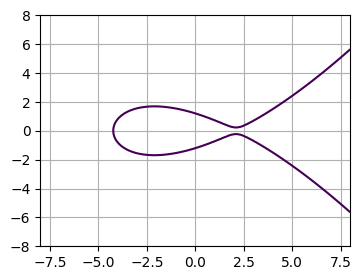

In [248]:
a = 0.075
b = -1
c = 1.4575131
m = 1/2

y, x = numpy.ogrid[-8:8:100j, -8:8:100j]
plt.figure( figsize=(4,3) )
plt.contour( x.ravel(), y.ravel(), 
            y**2 - a*x**3 - b *x  - c, [0] )
plt.grid()
plt.xlim( -8, 8)
plt.ylim( -8, 8)

In [249]:
num_qubits = 4

In [250]:
def init_state():
    pass 
    # for k in range(num_qubits):
    #     qml.PauliX(k)

In [251]:
num_layers = 1
var_state_class = arbitrary_state(num_qubits,num_layers)
var_state = var_state_class.construct_circuit

num_params = var_state_class.num_params
num_params

16

(<Figure size 400x500 with 1 Axes>, <Axes: >)

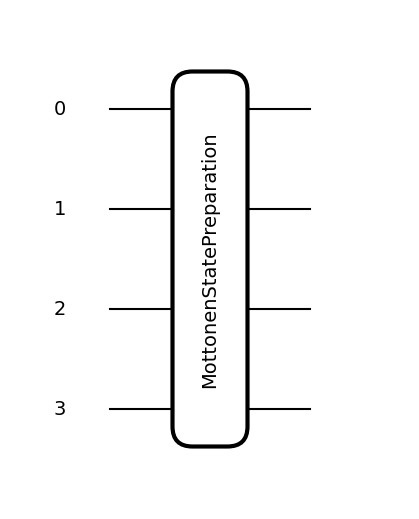

In [252]:
qml.draw_mpl( var_state )( num_params*[1] )

In [253]:
device = qml.device( "lightning.qubit", 
                    wires=num_qubits)

varqft = VarFourier( num_qubits,
                    lambda x : ( -a*x**3 - b*x ),
                    lambda p : p**2/(2*m),
                    device,
                    var_state  = var_state,
                    init_state = init_state,
                    xmin=-8,
                    xmax= 8,
                    tarjet_energy = c 
                    )

In [254]:
vals, vecs = varqft.energy_eigens()
idx_tarjet = np.argmin( np.abs( c- np.array(vals) ) )
val = vals[idx_tarjet]
vec = vecs[:,idx_tarjet]
val, c, vals

(1.457513154235416,
 1.4575131,
 array([-27.79260848, -15.28648178,  -6.56168902,  -0.97264387,
         -0.73600821,   0.51523772,   1.45751315,   1.97831701,
          2.90012671,   3.94585948,   5.1244897 ,   6.80418158,
          8.04011511,  12.43873508,  21.10736643,  33.66269573]))

In [255]:
varqft.energy_eval( vec )

2.9389513203425987e-15

In [256]:
np.random.seed(103)
params_init = vec.real + np.random.randn( num_params )*0.1
params_init = params_init / np.linalg.norm( params_init )
varqft.energy_eval( params_init )

0.23197399185550496

In [258]:
params_ground, energies_ground = varqft.run( params_init, 
                                            max_iterations = 100, 
                                            learning_rate  = 0.1,
                                            postprocessing = lambda x : x/np.linalg.norm(x),
                                            step_print=1 )

Step = 0,  Energy = 4.62364960
Step = 1,  Energy = 0.02597420
Step = 2,  Energy = 0.65023077
Step = 3,  Energy = 1.52178812
Step = 4,  Energy = 1.91971087
Step = 5,  Energy = 1.95822930
Step = 6,  Energy = 1.81136799
Step = 7,  Energy = 1.59219408
Step = 8,  Energy = 1.36053169
Step = 9,  Energy = 1.14409339
Step = 10,  Energy = 0.95347804
Step = 11,  Energy = 0.79085916
Step = 12,  Energy = 0.65460348
Step = 13,  Energy = 0.54160136
Step = 14,  Energy = 0.44840616
Step = 15,  Energy = 0.37173870
Step = 16,  Energy = 0.30868360
Step = 17,  Energy = 0.25674045
Step = 18,  Energy = 0.21381405
Step = 19,  Energy = 0.17817631
Step = 20,  Energy = 0.14841689
Step = 21,  Energy = 0.12340172
Step = 22,  Energy = 0.10222135
Step = 23,  Energy = 0.08415654
Step = 24,  Energy = 0.06864686
Step = 25,  Energy = 0.05526003
Step = 26,  Energy = 0.04367023
Step = 27,  Energy = 0.03363973
Step = 28,  Energy = 0.02500628
Step = 29,  Energy = 0.01766729
Step = 30,  Energy = 0.01157463
Step = 31,  Energy

In [ ]:
np.min(energies_ground)

0.3845784366130829

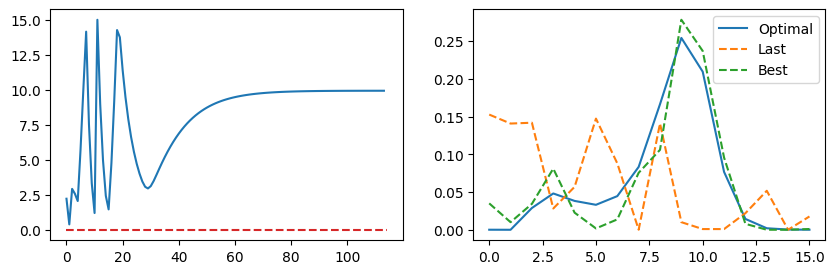

In [ ]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot( energies_ground )
ax[0].hlines( 0, 0, len(energies_ground), colors='tab:red', linestyles='--' ) 

ground_state = varqft.state( params_ground[np.argmin(energies_ground)] )
last_state = varqft.state( params_ground[-1] )

ax[1].plot( np.abs(vec)**2) 
ax[1].plot( np.abs(last_state)**2, '--' ) 
ax[1].plot( np.abs(ground_state)**2, '--' ) 
ax[1].legend(['Optimal','Last','Best']) 

In [ ]:
fid = np.abs( vecs.T.conj()@last_state )**2
fid, fid[idx_tarjet]

(tensor([0.01708828, 0.0035135 , 0.02554509, 0.03569968, 0.00552393,
         0.07287997, 0.00167951, 0.03426003, 0.03269699, 0.06931132,
         0.15133488, 0.01002571, 0.09894743, 0.08720968, 0.25485358,
         0.09943037], dtype=float32, requires_grad=True),
 tensor(0.09894743, dtype=float32, requires_grad=True))